In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from hpsklearn import HyperoptEstimator, pca, min_max_scaler, standard_scaler
from hpsklearn import xgboost_classification, random_forest, ada_boost, gradient_boosting, extra_trees
from hpsklearn import svc, svc_linear, svc_rbf, svc_poly, svc_sigmoid, liblinear_svc
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe, hp
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
df = pd.read_csv('Data/classification_testData_shape(395219,82).csv')

In [3]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,10000.0,0,11.44,329.48,117000.0,0,26.24,16.0,0.0,...,1990,0,0,1,0,0,0,0,0,0
1,1,8000.0,0,11.99,265.68,65000.0,0,22.05,17.0,0.0,...,2004,1,0,0,0,0,0,0,0,0
2,2,15600.0,0,10.49,506.97,43057.0,0,12.79,13.0,0.0,...,2007,1,0,0,0,0,0,0,0,0
3,3,7200.0,0,6.49,220.65,54000.0,0,2.60,6.0,0.0,...,2006,0,0,0,0,0,0,0,0,0
4,4,24375.0,1,17.27,609.33,55000.0,1,33.95,13.0,0.0,...,1999,0,1,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           395219 non-null  int64  
 1   loan_amnt                            395219 non-null  float64
 2   term                                 395219 non-null  int64  
 3   int_rate                             395219 non-null  float64
 4   installment                          395219 non-null  float64
 5   annual_inc                           395219 non-null  float64
 6   loan_status                          395219 non-null  int64  
 7   dti                                  395219 non-null  float64
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

In [5]:
df.shape

(395219, 83)

In [6]:
df.describe()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
count,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,395219.000000,...,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000
mean,198014.357931,14122.061250,0.237772,13.642094,432.069020,7.419937e+04,0.196152,17.390758,11.318494,0.178481,...,1997.861636,0.114620,0.028364,0.142739,0.114855,0.142711,0.141215,0.143920,0.027729,0.028151
std,114330.568945,8357.054944,0.425719,4.472944,250.700153,6.155725e+04,0.397085,18.032696,5.134901,0.531098,...,7.199028,0.318563,0.166011,0.349807,0.318848,0.349778,0.348244,0.351009,0.164195,0.165406
min,0.000000,500.000000,0.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,...,1944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98998.500000,8000.000000,0.000000,10.490000,250.330000,4.500000e+04,0.000000,11.300000,8.000000,0.000000,...,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,198015.000000,12000.000000,0.000000,13.330000,375.490000,6.400000e+04,0.000000,16.920000,10.000000,0.000000,...,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,297032.500000,20000.000000,0.000000,16.550000,567.790000,9.000000e+04,0.000000,22.990000,14.000000,0.000000,...,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,396029.000000,40000.000000,1.000000,30.990000,1533.810000,8.706582e+06,1.000000,9999.000000,90.000000,86.000000,...,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
class_names = {0:'Paid', 1:'Not Paid'}
print(df.loan_status.value_counts().rename(index = class_names))

Paid        317696
Not Paid     77523
Name: loan_status, dtype: int64


In [8]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [9]:
y.shape

(395219,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [11]:
preproc = hp.choice('myprepros_name', 
                    [
                        [min_max_scaler('myprepros_name.only_norm')],
                        [standard_scaler('myprepros_name.only_std_scaler')],
                        [pca('myprepros_name.only_pca')],
                        [pca('myprepros_name.pca'), min_max_scaler('myprepros_name.norm')],
                        [min_max_scaler('myprepros_name.first_norm'), standard_scaler('myprepros_name.second_std_scaler')],
                        []
                    ])

In [12]:
clf = hp.choice( 'model_name',
            [ random_forest ('model_name.random_forest'),
            ada_boost ('model_name.ada_boost'),
            gradient_boosting ('model_name.gradient_boosting'),
            xgboost_classification ('model_name.xgboost_classification'),
            extra_trees('model_name.extra_trees'),
            svc_linear('model_name.svc_linear'),
            svc_rbf('model_name.svc_rbf'),
            svc('model_name.svc')]) 

In [13]:
#preprocessing=[min_max_scaler('norm_scaler'), pca('my_pca') ]
#classifier=xgboost_classification('xgboost')
#preprocessing=any_preprocessing('pre')
#preprocessing = preproc
#classifier=any_classifier('cla')
#classifier=clf

#01. 100 times with classifier=any_classifier('cla') & preprocessing=any_preprocessing('pre')

#02. 100 times with classifier=clf & preprocessing = preproc

#03. 100 times with classifier=xgboost_classification('xgboost') & preprocessing = preproc

#04. 100 times with classifier=xgboost_classification('xgboost') & preprocessing = any_preprocessing('pre')

In [14]:
init_time = datetime.now()
accuracy = 0
best_model = None
#for i in range(100):
    #print (i)
model = HyperoptEstimator(  classifier= xgboost_classification('xgboost'), 
                                preprocessing= [], 
                                algo=tpe.suggest, 
                                max_evals=25, 
                                trial_timeout=5000)
    # perform the search
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
    #if acc > accuracy:
        #accuracy = acc
        #best_model = model
        #print (accuracy)

fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))

100%|██████████| 25/25 [21:08<00:00, 50.75s/trial, best loss: 0.10943232545950732]  
Execution time :  3:13:34.824851


In [15]:
#summarize the best model
print("Accuracy: %.3f" % acc)
print(model.best_model())

Accuracy: 0.890
{'learner': XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.9028348772888999, colsample_bynode=1,
              colsample_bytree=0.9857497638163848, gamma=0.0009618993047680283,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.07257415276026341, max_delta_step=0, max_depth=1,
              min_child_weight=81, missing=nan, monotone_constraints='()',
              n_estimators=6000, n_jobs=0, num_parallel_tree=1, random_state=2,
              reg_alpha=0.0013250385503230163, reg_lambda=2.969799449331543,
              scale_pos_weight=1, seed=2, subsample=0.9867143129907193,
              tree_method='exact', validate_parameters=1, verbosity=None), 'preprocs': (), 'ex_preprocs': ()}


In [16]:
init_time = datetime.now()
model = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.9028348772888999, colsample_bynode=1,
              colsample_bytree=0.9857497638163848, gamma=0.0009618993047680283,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.07257415276026341, max_delta_step=0, max_depth=1,
              min_child_weight=81, missing=None, monotone_constraints='()',
              n_estimators=6000, n_jobs=0, num_parallel_tree=1, random_state=2,
              reg_alpha=0.0013250385503230163, reg_lambda=2.969799449331543,
              scale_pos_weight=1, seed=2, subsample=0.9867143129907193,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#print(f"F-measure of XGB: {mean(scores):.3f}")
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))

Execution time :  0:07:59.339010


In [17]:
f1_score = round(f1_score(y_test, prediction), 2)
recall_score = round(recall_score(y_test, prediction), 2)
print("Sensitivity/Recall: {recall_score}".format(recall_score = recall_score))
print("F1 Score: {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall: 0.47
F1 Score: 0.63


In [18]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     95309
           1       0.94      0.47      0.63     23257

    accuracy                           0.89    118566
   macro avg       0.91      0.73      0.78    118566
weighted avg       0.90      0.89      0.87    118566



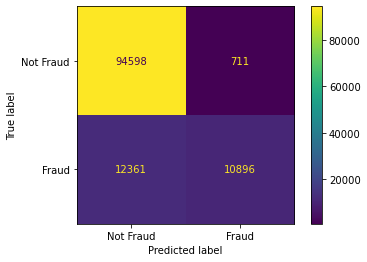

In [19]:
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=["Not Fraud","Fraud"]);

In [15]:
#summarize the best model
print("Accuracy: %.3f" % acc)
print(model.best_model())

Accuracy: 0.890
{'learner': XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.6606635042367097, colsample_bynode=1,
              colsample_bytree=0.539503526884835, gamma=0.2829235642773983,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0050678950480702875, max_delta_step=0,
              max_depth=8, min_child_weight=12, missing=nan,
              monotone_constraints='()', n_estimators=2800, n_jobs=0,
              num_parallel_tree=1, random_state=4,
              reg_alpha=0.00015627688161596324, reg_lambda=1.2142350925763328,
              scale_pos_weight=1, seed=4, subsample=0.7678023176548983,
              tree_method='exact', validate_parameters=1, verbosity=None), 'preprocs': (), 'ex_preprocs': ()}


In [16]:
init_time = datetime.now()
model = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.6606635042367097, colsample_bynode=1,
              colsample_bytree=0.539503526884835, gamma=0.2829235642773983,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0050678950480702875, max_delta_step=0,
              max_depth=8, min_child_weight=12, missing=None,
              monotone_constraints='()', n_estimators=2800, n_jobs=0,
              num_parallel_tree=1, random_state=4,
              reg_alpha=0.00015627688161596324, reg_lambda=1.2142350925763328,
              scale_pos_weight=1, seed=4, subsample=0.7678023176548983,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#print(f"F-measure of XGB: {mean(scores):.3f}")
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))

Execution time :  0:12:12.396865


In [17]:
f1_score = round(f1_score(y_test, prediction), 2)
recall_score = round(recall_score(y_test, prediction), 2)
print("Sensitivity/Recall: {recall_score}".format(recall_score = recall_score))
print("F1 Score: {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall: 0.47
F1 Score: 0.63


In [18]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     95309
           1       0.93      0.47      0.63     23257

    accuracy                           0.89    118566
   macro avg       0.91      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566



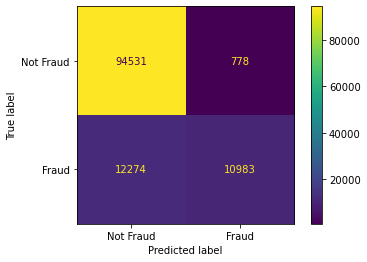

In [19]:
#class_names = {0:'Not Fraud', 1:'Fraud'}
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=["Not Fraud","Fraud"]);